# Addition of new_deaths/confirmed and smoothed (7 days) data

In [1]:
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd
import numpy as np
from IPython import display

## 0. Recovered Data

In [2]:
# Reading file as dictionary
df = pd.read_excel('Germany_JHU_Recovered.xlsx')
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,2021-01-08 00:00:00,2021-02-08 00:00:00,2021-03-08 00:00:00,2021-04-08 00:00:00
0,NaN,Germany,51.165691,10.451526,0,0,0,0,0,0,...,3645870,3647240,3653990,3649670,3652400,3653150,3654720,3654950,3658150,3659260


In [3]:
# Obtaining the deaths values since the beginning
X_original = df.values[:,4:565]
X_original

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 12, 12, 12, 14, 14, 14, 14, 14, 15, 16, 16, 16,
        16, 16, 16, 16, 16, 17, 18, 18, 18, 18, 25, 25, 46, 46, 46, 67,
        67, 105, 113, 180, 233, 266, 266, 3243, 3547, 5673, 6658, 8481,
        9211, 13500, 16100, 18700, 22440, 24575, 26400, 28700, 28700,
        36081, 46300, 52407, 53913, 57400, 60300, 64300, 68200, 72600,
        77000, 83114, 85400, 88000, 91500, 95200, 99400, 103300, 109800,
        109800, 112000, 114500, 117400, 120400, 123500, 126900, 129000,
        130600, 132700, 135100, 139900, 141700, 141700, 143300, 144400,
        145617, 147200, 148700, 150300, 151597, 152600, 154011, 155041,
        155681, 156966, 158087, 159064, 159716, 160281, 161199, 161967,
        162820, 163360, 164245, 164908, 165352, 165632, 166609, 167453,
        167909, 168480, 168958, 169224, 169556, 170129, 170630, 170961,
        171535, 171970, 172089, 172692, 172842, 173599, 173847, 1

In [4]:
# Transposition of the data

X_trap = np.transpose(X_original)  # Transposition of the data
X_trap.shape, X_trap[0:10], X_trap[-1]

((561, 1),
 array([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0]], dtype=object),
 array([3659260], dtype=object))

In [5]:
# Converting data array (Total Recovered) in an unique int array

T_recovered = np.empty(len(X_trap), dtype = object)
for i in range(len(T_recovered)):
    T_recovered[i] = int(X_trap[i])
    
T_recovered.shape, T_recovered[0:20]

((561,),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       dtype=object))

## 1. Death Data

In [6]:
# Reading file as dictionary
df = pd.read_excel('Germany_OWID_Confirmed_Deaths.xlsx')
df.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths
0,DEU,Europe,Germany,2020-01-22,0,0.0,0,0.0
1,DEU,Europe,Germany,2020-01-23,0,0.0,0,0.0
2,DEU,Europe,Germany,2020-01-24,0,0.0,0,0.0
3,DEU,Europe,Germany,2020-01-25,0,0.0,0,0.0
4,DEU,Europe,Germany,2020-01-26,0,0.0,0,0.0


In [7]:
# Obtaining the deaths values since the beginning
T_deaths_original = df.values[:,6]

# Adjust to Recovered Data
T_deaths_original = T_deaths_original[0:len(T_recovered)]

T_deaths_original[0:50]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 3], dtype=object)

In [8]:
# Creation of New Deaths (Death[t] - Death[t-1])

N_deaths = np.empty(len(T_deaths_original), dtype = object)
N_deaths[0] = 0  # First value is 0
for i in range(1, len(N_deaths)):
    result = T_deaths_original[i] - T_deaths_original[i-1]
    if result >= 0:
        N_deaths[i] = result
    else:
        N_deaths[i] = 0

N_deaths.shape, N_deaths

((561,),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 2, 0, 1, 0, 4, 2, 2, 6, 7, 4, 16, 23, 17, 10, 29, 34, 49,
        61, 75, 91, 100, 112, 130, 145, 187, 168, 169, 140, 226, 206, 333,
        258, 160, 0, 286, 172, 100, 510, 248, 300, 107, 127, 276, 171, 246,
        296, 185, 117, 99, 150, 188, 153, 156, 113, 76, 54, 127, 0, 282,
        117, 118, 39, 20, 92, 77, 123, 23, 13, 41, 24, 41, 78, 63, 59, 25,
        33, 22, 26, 63, 56, 42, 34, 26, 10, 15, 8, 39, 33, 23, 15, 12, 10,
        41, 16, 20, 11, 10, 8, 6, 13, 31, 24, 12, 8, 0, 4, 15, 14, 12, 25,
        3, 0, 8, 14, 5, 11, 4, 10, 3, 0, 10, 14, 11, 6, 7, 1, 3, 4, 2, 7,
        1, 3, 1, 2, 5, 3, 8, 10, 4, 0, 1, 6, 4, 9, 3, 7, 0, 0, 9, 16, 2,
        14, 6, 1, 1, 5, 5, 4, 13, 5, 0, 1, 5, 8, 14, 3, 6, 3, 1, 5, 4, 5,
        0, 9, 1, 3, 4, 15, 0, 5, 2, 1, 1, 5, 6, 3, 3, 4, 2, 2, 11, 6, 3,
        10, 2, 2, 0, 15, 

In [9]:
# Creation of New Deaths Smoothed (7 days average)

N_deaths_smooth = np.empty(len(T_deaths_original)-6, dtype = object)  # 6 first values are not available
for i in range(0, len(T_deaths_original)-6):
    sum_N = 0
    for j in range(i, i+7):
        sum_N = sum_N + N_deaths[j]
    N_deaths_smooth[i] = (sum_N/7)

N_deaths_smooth.shape, N_deaths_smooth

((555,),
 array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.2857142857142857, 0.2857142857142857,
        0.42857142857142855, 0.42857142857142855, 1.0, 1.2857142857142858,
        1.5714285714285714, 2.142857142857143, 3.142857142857143,
        3.5714285714285716, 5.857142857142857, 8.571428571428571,
        10.714285714285714, 11.857142857142858, 15.142857142857142, 19.0,
        25.428571428571427, 31.857142857142858, 39.285714285714285,
        49.857142857142854, 62.714285714285715, 74.57142857142857,
        88.28571428571429, 102.0, 120.0, 133.28571428571428,
        144.42857142857142, 150.14285714285714, 166.42857142857142,
        177.28571428571428, 204.14285714285714, 214.28571428571428,
        213.14285714285714, 189.0, 209.85714285714286, 202.14285714285714,
        187.0, 212.2857142

In [10]:
# Creation of Fixed Total Deaths (Accumulative sum of N_deaths array)
T_deaths_fix = np.empty(len(T_deaths_original), dtype = object)
T_deaths_fix[0] = 0

sum_T = 0
for i in range(1, len(T_deaths_original)):
    sum_T = sum_T + N_deaths[i]
    T_deaths_fix[i] = sum_T

T_deaths_fix.shape, T_deaths_fix

((561,),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 2, 2, 3, 3, 7, 9, 11, 17, 24, 28, 44, 67, 84, 94, 123,
        157, 206, 267, 342, 433, 533, 645, 775, 920, 1107, 1275, 1444,
        1584, 1810, 2016, 2349, 2607, 2767, 2767, 3053, 3225, 3325, 3835,
        4083, 4383, 4490, 4617, 4893, 5064, 5310, 5606, 5791, 5908, 6007,
        6157, 6345, 6498, 6654, 6767, 6843, 6897, 7024, 7024, 7306, 7423,
        7541, 7580, 7600, 7692, 7769, 7892, 7915, 7928, 7969, 7993, 8034,
        8112, 8175, 8234, 8259, 8292, 8314, 8340, 8403, 8459, 8501, 8535,
        8561, 8571, 8586, 8594, 8633, 8666, 8689, 8704, 8716, 8726, 8767,
        8783, 8803, 8814, 8824, 8832, 8838, 8851, 8882, 8906, 8918, 8926,
        8926, 8930, 8945, 8959, 8971, 8996, 8999, 8999, 9007, 9021, 9026,
        9037, 9041, 9051, 9054, 9054, 9064, 9078, 9089, 9095, 9102, 9103,
        9106, 9110, 9112, 9119, 91

In [11]:
# Creation of Total Deaths Fixed Smoothed (7 days average)

T_deaths_smooth_fix = np.empty(len(T_deaths_original)-6, dtype = object)  # 6 first values are not available
for i in range(0, len(T_deaths_original)-6):
    sum_T = 0
    for j in range(i, i+7):
        sum_T = sum_T + T_deaths_fix[j]
    T_deaths_smooth_fix[i] = (sum_T/7)

T_deaths_smooth_fix.shape, T_deaths_smooth_fix

((555,),
 array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.2857142857142857, 0.5714285714285714, 1.0,
        1.4285714285714286, 2.4285714285714284, 3.7142857142857144,
        5.285714285714286, 7.428571428571429, 10.571428571428571,
        14.142857142857142, 20.0, 28.571428571428573, 39.285714285714285,
        51.142857142857146, 66.28571428571429, 85.28571428571429,
        110.71428571428571, 142.57142857142858, 181.85714285714286,
        231.71428571428572, 294.42857142857144, 369.0, 457.2857142857143,
        559.2857142857143, 679.2857142857143, 812.5714285714286, 957.0,
        1107.142857142857, 1273.5714285714287, 1450.857142857143, 1655.0,
        1869.2857142857142, 2082.4285714285716, 2271.4285714285716,
        2481.285714285714, 2683.4285714285716, 2870.4285714285716,
        3082

In [12]:
# Collecting the dates

dates = df.values[:,3]

# Adjust to Recovered Data
dates = dates[0:len(T_recovered)]
dates.shape, dates[0:15]

((561,),
 array([Timestamp('2020-01-22 00:00:00'), Timestamp('2020-01-23 00:00:00'),
        Timestamp('2020-01-24 00:00:00'), Timestamp('2020-01-25 00:00:00'),
        Timestamp('2020-01-26 00:00:00'), Timestamp('2020-01-27 00:00:00'),
        Timestamp('2020-01-28 00:00:00'), Timestamp('2020-01-29 00:00:00'),
        Timestamp('2020-01-30 00:00:00'), Timestamp('2020-01-31 00:00:00'),
        Timestamp('2020-02-01 00:00:00'), Timestamp('2020-02-02 00:00:00'),
        Timestamp('2020-02-03 00:00:00'), Timestamp('2020-02-04 00:00:00'),
        Timestamp('2020-02-05 00:00:00')], dtype=object))

In [13]:
# Checking if dates and data points have the same length
len(dates), len(T_deaths_original)

(561, 561)

In [14]:
# Create array with the iso_code of the country
iso_code = np.empty(len(dates), dtype = object)
for i in range(len(iso_code)):
    iso_code[i] = 'DEU'
    
iso_code.shape, iso_code[0:10]

((561,),
 array(['DEU', 'DEU', 'DEU', 'DEU', 'DEU', 'DEU', 'DEU', 'DEU', 'DEU',
        'DEU'], dtype=object))

In [15]:
# Create array with the continent of the country
continent = np.empty(len(dates), dtype = object)
for i in range(len(continent)):
    continent[i] = 'Europe'
    
continent.shape, continent[0:10]

((561,),
 array(['Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe',
        'Europe', 'Europe', 'Europe', 'Europe'], dtype=object))

In [16]:
# Create array with the name of the country
region = np.empty(len(dates), dtype = object)
for i in range(len(region)):
    region[i] = 'Germany'
    
region.shape, region[0:10]

((561,),
 array(['Germany', 'Germany', 'Germany', 'Germany', 'Germany', 'Germany',
        'Germany', 'Germany', 'Germany', 'Germany'], dtype=object))

In [17]:
# Array concatenation for building the final dataframe

columns = 9  # Number of columns
X_total = np.empty((len(T_deaths_smooth_fix), columns), dtype = object)

# The first 6 values are not included to match the length of N_deaths_smooth
for i in range(len(T_deaths_smooth_fix)):
    X_total[i] = [iso_code[i+6], continent[i+6], region[i+6], dates[i+6], T_deaths_original[i+6],
                  N_deaths[i+6], N_deaths_smooth[i], T_deaths_fix[i+6], T_deaths_smooth_fix[i]]
    
X_total.shape, X_total[0:10]

((555, 9),
 array([['DEU', 'Europe', 'Germany', Timestamp('2020-01-28 00:00:00'), 0,
         0, 0.0, 0, 0.0],
        ['DEU', 'Europe', 'Germany', Timestamp('2020-01-29 00:00:00'), 0,
         0, 0.0, 0, 0.0],
        ['DEU', 'Europe', 'Germany', Timestamp('2020-01-30 00:00:00'), 0,
         0, 0.0, 0, 0.0],
        ['DEU', 'Europe', 'Germany', Timestamp('2020-01-31 00:00:00'), 0,
         0, 0.0, 0, 0.0],
        ['DEU', 'Europe', 'Germany', Timestamp('2020-02-01 00:00:00'), 0,
         0, 0.0, 0, 0.0],
        ['DEU', 'Europe', 'Germany', Timestamp('2020-02-02 00:00:00'), 0,
         0, 0.0, 0, 0.0],
        ['DEU', 'Europe', 'Germany', Timestamp('2020-02-03 00:00:00'), 0,
         0, 0.0, 0, 0.0],
        ['DEU', 'Europe', 'Germany', Timestamp('2020-02-04 00:00:00'), 0,
         0, 0.0, 0, 0.0],
        ['DEU', 'Europe', 'Germany', Timestamp('2020-02-05 00:00:00'), 0,
         0, 0.0, 0, 0.0],
        ['DEU', 'Europe', 'Germany', Timestamp('2020-02-06 00:00:00'), 0,
         0, 0.0

In [18]:
# Labels of each column of the dataframe
labels = ['ISO_code', 'Continent', 'Country/Region', 'Date', 'Total Deaths', 'New Deaths',
          'New Deaths Smooth (7 days)', 'Total Deaths Fixed (sum New Deaths)', 'Total Deaths Fixed Smooth (7 days)']

In [19]:
# Creation of the final dataframe
df_deaths = pd.DataFrame(data=X_total, columns=labels)
df_deaths

,ISO_code,Continent,Country/Region,Date,Total Deaths,New Deaths,New Deaths Smooth (7 days),Total Deaths Fixed (sum New Deaths),Total Deaths Fixed Smooth (7 days)
0,DEU,Europe,Germany,2020-01-28,0,0,0.0,0,0.0
1,DEU,Europe,Germany,2020-01-29,0,0,0.0,0,0.0
2,DEU,Europe,Germany,2020-01-30,0,0,0.0,0,0.0
3,DEU,Europe,Germany,2020-01-31,0,0,0.0,0,0.0
4,DEU,Europe,Germany,2020-02-01,0,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...
550,DEU,Europe,Germany,2021-07-31,91666,3,31.714286,91786,91693.0
551,DEU,Europe,Germany,2021-08-01,91666,0,31.285714,91786,91724.285714
552,DEU,Europe,Germany,2021-08-02,91685,19,28.428571,91805,91752.714286
553,DEU,Europe,Germany,2021-08-03,91710,25,29.285714,91830,91782.0


In [20]:
# Export dataframe to a csv file

from pathlib import Path  
filepath = Path('Deaths_DEU.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df_deaths.to_csv(filepath, index=False)

## 2. Confirmed Data

In [21]:
# Reading file as dictionary
df = pd.read_excel('Germany_OWID_Confirmed_Deaths.xlsx')
df.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths
0,DEU,Europe,Germany,2020-01-22,0,0.0,0,0.0
1,DEU,Europe,Germany,2020-01-23,0,0.0,0,0.0
2,DEU,Europe,Germany,2020-01-24,0,0.0,0,0.0
3,DEU,Europe,Germany,2020-01-25,0,0.0,0,0.0
4,DEU,Europe,Germany,2020-01-26,0,0.0,0,0.0


In [22]:
# Obtaining the confirmed values since the beginning
T_cases_original = df.values[:,4]
N_cases_original = df.values[:,5]

# Adjust length to Recovered Data
T_cases_original = T_cases_original[0:len(T_recovered)]
N_cases_original = N_cases_original[0:len(T_recovered)]

T_cases_original[0:20], N_cases_original[0:20], T_cases_original.shape, N_cases_original.shape

(array([0, 0, 0, 0, 0, 1, 4, 4, 4, 5, 8, 10, 12, 12, 12, 12, 13, 13, 14,
        14], dtype=object),
 array([0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 3.0, 0.0, 0.0, 1.0, 3.0, 2.0, 2.0,
        0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0], dtype=object),
 (561,),
 (561,))

In [23]:
# Creation of New Confirmed (Confirmed[t] - Confirmed[t-1])

N_confirmed = np.empty(len(X_trap), dtype = object)
N_confirmed[0] = 0  # First value is 0
for i in range(1, len(N_confirmed)):
    result = T_cases_original[i] - T_cases_original[i-1]
    if result >= 0:
        N_confirmed[i] = result
    else:
        N_confirmed[i] = 0

N_confirmed.shape, N_confirmed

((561,),
 array([0, 0, 0, 0, 0, 1, 3, 0, 0, 1, 3, 2, 2, 0, 0, 0, 1, 0, 1, 0, 2, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 10, 19, 2, 31, 51, 29, 37,
        66, 220, 188, 129, 241, 136, 281, 451, 170, 1597, 910, 1210, 1477,
        1985, 3070, 2993, 4528, 2365, 2660, 4183, 3930, 4337, 6615, 6933,
        6824, 4400, 4790, 4923, 6064, 6922, 6365, 4933, 4031, 3251, 4289,
        5633, 4885, 3990, 2737, 2946, 2218, 1287, 3394, 2945, 3699, 1945,
        1842, 1881, 1226, 2357, 2481, 1870, 1514, 1257, 988, 1154, 1627,
        1470, 1068, 890, 697, 488, 855, 1155, 1268, 1158, 736, 555, 697,
        595, 927, 380, 755, 519, 617, 182, 1227, 695, 548, 689, 276, 342,
        272, 600, 324, 672, 726, 267, 221, 184, 285, 242, 351, 452, 526,
        300, 359, 397, 16, 169, 535, 41, 251, 164, 570, 352, 1213, 482,
        371, 602, 496, 712, 391, 500, 665, 422, 235, 349, 376, 475, 477,
        410, 418, 325, 541, 279, 356, 302, 331, 377, 210, 261, 276, 434,
        560, 595, 381, 309, 590, 39

In [24]:
# Creation of New Confirmed Smoothed (7 days average)

N_confirmed_smooth = np.empty(len(X_trap)-6, dtype = object)  # 6 first values are not available
for i in range(0, len(N_confirmed)-6):
    sum_N = 0
    for j in range(i, i+7):
        sum_N = sum_N + N_confirmed[j]
    N_confirmed_smooth[i] = (sum_N/7)

N_confirmed_smooth.shape, N_confirmed_smooth

((555,),
 array([0.5714285714285714, 0.5714285714285714, 0.5714285714285714,
        0.7142857142857143, 1.1428571428571428, 1.4285714285714286,
        1.5714285714285714, 1.1428571428571428, 1.1428571428571428,
        1.1428571428571428, 1.1428571428571428, 0.7142857142857143,
        0.5714285714285714, 0.2857142857142857, 0.5714285714285714,
        0.5714285714285714, 0.5714285714285714, 0.42857142857142855,
        0.42857142857142855, 0.2857142857142857, 0.2857142857142857, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.14285714285714285,
        1.5714285714285714, 4.285714285714286, 4.571428571428571, 9.0,
        16.285714285714285, 20.428571428571427, 25.571428571428573,
        33.57142857142857, 62.285714285714285, 88.85714285714286,
        102.85714285714286, 130.0, 145.28571428571428, 180.14285714285714,
        235.14285714285714, 228.0, 429.2857142857143, 540.8571428571429,
        679.2857142857143, 870.8571428571429, 1114.2857142857142,
        1488.4285714285713, 18

In [25]:
# Creation of Fixed Total Confirmed (Accumulative sum of N_confirmed array)
T_confirmed_fix = np.empty(len(N_confirmed), dtype = object)
T_confirmed_fix[0] = 0

sum_T = 0
for i in range(1, len(N_confirmed)):
    sum_T = sum_T + N_confirmed[i]
    T_confirmed_fix[i] = sum_T

T_confirmed_fix.shape, T_confirmed_fix

((561,),
 array([0, 0, 0, 0, 0, 1, 4, 4, 4, 5, 8, 10, 12, 12, 12, 12, 13, 13, 14,
        14, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 27,
        46, 48, 79, 130, 159, 196, 262, 482, 670, 799, 1040, 1176, 1457,
        1908, 2078, 3675, 4585, 5795, 7272, 9257, 12327, 15320, 19848,
        22213, 24873, 29056, 32986, 37323, 43938, 50871, 57695, 62095,
        66885, 71808, 77872, 84794, 91159, 96092, 100123, 103374, 107663,
        113296, 118181, 122171, 124908, 127854, 130072, 131359, 134753,
        137698, 141397, 143342, 145184, 147065, 148291, 150648, 153129,
        154999, 156513, 157770, 158758, 159912, 161539, 163009, 164077,
        164967, 165664, 166152, 167007, 168162, 169430, 170588, 171324,
        171879, 172576, 173171, 174098, 174478, 175233, 175752, 176369,
        176551, 177778, 178473, 179021, 179710, 179986, 180328, 180600,
        181200, 181524, 182196, 182922, 183189, 183410, 183594, 183879,
        184121, 184472, 184924, 185450, 185750, 1

In [26]:
# Creation of Fixed Total Alive Confirmed (Accumulative sum of N_confirmed array - Total Deaths)
T_confirmed_alive_fix = np.empty(len(T_confirmed_fix), dtype = object)

for i in range(0, len(T_confirmed_fix)):
    T_confirmed_alive_fix[i] = T_confirmed_fix[i] - T_deaths_fix[i]

T_confirmed_alive_fix.shape, T_confirmed_alive_fix

((561,),
 array([0, 0, 0, 0, 0, 1, 4, 4, 4, 5, 8, 10, 12, 12, 12, 12, 13, 13, 14,
        14, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 27,
        46, 48, 79, 130, 159, 196, 262, 482, 670, 799, 1040, 1174, 1455,
        1905, 2075, 3668, 4576, 5784, 7255, 9233, 12299, 15276, 19781,
        22129, 24779, 28933, 32829, 37117, 43671, 50529, 57262, 61562,
        66240, 71033, 76952, 83687, 89884, 94648, 98539, 101564, 105647,
        110947, 115574, 119404, 122141, 124801, 126847, 128034, 130918,
        133615, 137014, 138852, 140567, 142172, 143227, 145338, 147523,
        149208, 150605, 151763, 152601, 153567, 155041, 156355, 157310,
        158124, 158767, 159128, 159983, 160856, 162007, 163047, 163744,
        164279, 164884, 165402, 166206, 166563, 167305, 167783, 168376,
        168517, 169666, 170298, 170787, 171451, 171694, 172014, 172260,
        172797, 173065, 173695, 174387, 174628, 174839, 175008, 175285,
        175488, 175806, 176235, 176746, 177034, 17

In [27]:
# Alive Confirmed Accumulated

Ac_confirmed_alive = np.empty(len(N_confirmed), dtype = object)

for i in range(0, len(T_confirmed_fix), 1):
    Ac_confirmed_alive[i] = T_confirmed_alive_fix[i] - T_recovered[i]

Ac_confirmed_alive.shape, Ac_confirmed_alive

((561,),
 array([0, 0, 0, 0, 0, 1, 4, 4, 4, 5, 8, 10, 12, 12, 12, 12, 13, 13, 14,
        14, 16, 16, 15, 15, 15, 15, 15, 4, 4, 4, 2, 2, 2, 2, 3, 12, 30, 32,
        63, 114, 143, 180, 246, 466, 653, 781, 1022, 1156, 1437, 1880,
        2050, 3622, 4530, 5738, 7188, 9166, 12194, 15163, 19601, 21896,
        24513, 28667, 29586, 33570, 37998, 43871, 48781, 52351, 52740,
        54933, 58252, 61247, 65309, 68248, 69839, 72864, 69566, 64647,
        63167, 65491, 64741, 64501, 62547, 59834, 58318, 56615, 53900,
        53452, 52567, 50672, 48027, 45938, 44223, 39408, 40805, 39763,
        38101, 36167, 34641, 32855, 30410, 29124, 28167, 26428, 24883,
        20956, 20307, 21347, 20444, 19879, 19267, 18202, 17506, 16263,
        15708, 15183, 14365, 13476, 13985, 13332, 12700, 12387, 11978,
        11733, 11061, 10830, 10245, 10335, 10142, 9720, 9487, 9376, 8676,
        8035, 7897, 7755, 7788, 7810, 7827, 7610, 7109, 6927, 6877, 6473,
        6597, 6152, 6559, 6123, 7064, 7409, 7135, 7606

In [28]:
# Creation of Alive Accumulated Confirmed Smoothed (7 days average)

Ac_confirmed_alive_smooth = np.empty(len(X_trap)-6, dtype = object)  # 6 first values are not available
for i in range(0, len(Ac_confirmed_alive)-6):
    sum_Ac = 0
    for j in range(i, i+7):
        sum_Ac = sum_Ac + Ac_confirmed_alive[j]
    Ac_confirmed_alive_smooth[i] = (sum_Ac/7)

Ac_confirmed_alive_smooth.shape, Ac_confirmed_alive_smooth

((555,),
 array([0.7142857142857143, 1.2857142857142858, 1.8571428571428572,
        2.5714285714285716, 3.7142857142857144, 5.142857142857143,
        6.714285714285714, 7.857142857142857, 9.0, 10.142857142857142,
        11.285714285714286, 12.0, 12.571428571428571, 12.857142857142858,
        13.428571428571429, 14.0, 14.428571428571429, 14.714285714285714,
        15.0, 15.142857142857142, 15.285714285714286, 13.571428571428571,
        11.857142857142858, 10.285714285714286, 8.428571428571429,
        6.571428571428571, 4.714285714285714, 2.857142857142857,
        2.7142857142857144, 3.857142857142857, 7.571428571428571,
        11.857142857142858, 20.571428571428573, 36.57142857142857,
        56.714285714285715, 82.0, 115.42857142857143, 177.71428571428572,
        266.42857142857144, 369.0, 498.7142857142857, 643.4285714285714,
        823.0, 1056.4285714285713, 1282.7142857142858, 1706.857142857143,
        2242.4285714285716, 2916.1428571428573, 3777.8571428571427, 4882.0,
 

In [29]:
# Collecting the dates

dates = df.values[:,3]

#Adjust to Recovered Data
dates = dates[0:len(T_recovered)]
dates.shape, dates[0:15]

((561,),
 array([Timestamp('2020-01-22 00:00:00'), Timestamp('2020-01-23 00:00:00'),
        Timestamp('2020-01-24 00:00:00'), Timestamp('2020-01-25 00:00:00'),
        Timestamp('2020-01-26 00:00:00'), Timestamp('2020-01-27 00:00:00'),
        Timestamp('2020-01-28 00:00:00'), Timestamp('2020-01-29 00:00:00'),
        Timestamp('2020-01-30 00:00:00'), Timestamp('2020-01-31 00:00:00'),
        Timestamp('2020-02-01 00:00:00'), Timestamp('2020-02-02 00:00:00'),
        Timestamp('2020-02-03 00:00:00'), Timestamp('2020-02-04 00:00:00'),
        Timestamp('2020-02-05 00:00:00')], dtype=object))

In [30]:
# Checking if dates and data points have the same length
len(dates), len(X_trap)

(561, 561)

In [31]:
# Create array with the iso_code of the country
iso_code = np.empty(len(dates), dtype = object)
for i in range(len(iso_code)):
    iso_code[i] = 'DEU'
    
iso_code.shape, iso_code[0:10]

((561,),
 array(['DEU', 'DEU', 'DEU', 'DEU', 'DEU', 'DEU', 'DEU', 'DEU', 'DEU',
        'DEU'], dtype=object))

In [32]:
# Create array with the continent of the country
continent = np.empty(len(dates), dtype = object)
for i in range(len(continent)):
    continent[i] = 'Europe'
    
continent.shape, continent[0:10]

((561,),
 array(['Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe',
        'Europe', 'Europe', 'Europe', 'Europe'], dtype=object))

In [33]:
# Create array with the name of the country
region = np.empty(len(dates), dtype = object)
for i in range(len(region)):
    region[i] = 'Germany'
    
region.shape, region[0:10]

((561,),
 array(['Germany', 'Germany', 'Germany', 'Germany', 'Germany', 'Germany',
        'Germany', 'Germany', 'Germany', 'Germany'], dtype=object))

In [34]:
# Array concatenation for building the final dataframe

columns = 11  # Number of columns
X_total = np.empty((len(N_confirmed_smooth), columns), dtype = object)

# The first 6 values are not included to match the length of N_confirmed_smooth
for i in range(len(N_confirmed_smooth)):
    X_total[i] = [iso_code[i+6], continent[i+6], region[i+6], dates[i+6], T_cases_original[i+6], N_confirmed[i+6],
                  N_confirmed_smooth[i], T_confirmed_fix[i+6], T_confirmed_alive_fix[i+6], 
                  Ac_confirmed_alive[i+6], Ac_confirmed_alive_smooth[i]]
    
X_total.shape, X_total[0:10]

((555, 11),
 array([['DEU', 'Europe', 'Germany', Timestamp('2020-01-28 00:00:00'), 4,
         3, 0.5714285714285714, 4, 4, 4, 0.7142857142857143],
        ['DEU', 'Europe', 'Germany', Timestamp('2020-01-29 00:00:00'), 4,
         0, 0.5714285714285714, 4, 4, 4, 1.2857142857142858],
        ['DEU', 'Europe', 'Germany', Timestamp('2020-01-30 00:00:00'), 4,
         0, 0.5714285714285714, 4, 4, 4, 1.8571428571428572],
        ['DEU', 'Europe', 'Germany', Timestamp('2020-01-31 00:00:00'), 5,
         1, 0.7142857142857143, 5, 5, 5, 2.5714285714285716],
        ['DEU', 'Europe', 'Germany', Timestamp('2020-02-01 00:00:00'), 8,
         3, 1.1428571428571428, 8, 8, 8, 3.7142857142857144],
        ['DEU', 'Europe', 'Germany', Timestamp('2020-02-02 00:00:00'), 10,
         2, 1.4285714285714286, 10, 10, 10, 5.142857142857143],
        ['DEU', 'Europe', 'Germany', Timestamp('2020-02-03 00:00:00'), 12,
         2, 1.5714285714285714, 12, 12, 12, 6.714285714285714],
        ['DEU', 'Europe', 'Ger

In [35]:
# Labels of each column of the dataframe
labels = ['ISO_code', 'Continent', 'Country/Region', 'Date', 'Total Confirmed', 'New Confirmed', 'New Confirmed Smooth (7 days)',
          'Total Confirmed Fixed (sum New Confirmed)', 'Total Alive Confirmed Fixed (sum New Confirmed - Total Deaths)',
          'Accumulated Alive Confirmed in 14 days', 'Accumulated Alive Confirmed Smooth in 14 days']

In [36]:
# Creation of the final dataframe
df_confirmed = pd.DataFrame(data=X_total, columns=labels)
df_confirmed

,ISO_code,Continent,Country/Region,Date,Total Confirmed,New Confirmed,New Confirmed Smooth (7 days),Total Confirmed Fixed (sum New Confirmed),Total Alive Confirmed Fixed (sum New Confirmed - Total Deaths),Accumulated Alive Confirmed in 14 days,Accumulated Alive Confirmed Smooth in 14 days
0,DEU,Europe,Germany,2020-01-28,4,3,0.571429,4,4,4,0.714286
1,DEU,Europe,Germany,2020-01-29,4,0,0.571429,4,4,4,1.285714
2,DEU,Europe,Germany,2020-01-30,4,0,0.571429,4,4,4,1.857143
3,DEU,Europe,Germany,2020-01-31,5,1,0.714286,5,5,5,2.571429
4,DEU,Europe,Germany,2020-02-01,8,3,1.142857,8,8,8,3.714286
...,...,...,...,...,...,...,...,...,...,...,...
550,DEU,Europe,Germany,2021-07-31,3776724,1806,2122.142857,3776724,3684938,31788,28392.714286
551,DEU,Europe,Germany,2021-08-01,3778277,1553,2179.857143,3778277,3686491,31771,29089.857143
552,DEU,Europe,Germany,2021-08-02,3779797,1520,2193.714286,3779797,3687992,33042,29958.0
553,DEU,Europe,Germany,2021-08-03,3782344,2547,2263.285714,3782344,3690514,32364,30633.428571


In [37]:
# Export dataframe to a csv file

from pathlib import Path  
filepath = Path('Confirmed_DEU_OF.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df_confirmed.to_csv(filepath, index=False)

Text(0.5, 1.0, 'Infected Official')

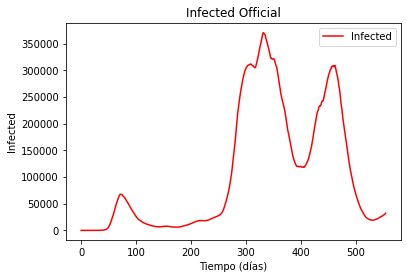

In [38]:
plt.plot(range(0, len(Ac_confirmed_alive_smooth)), Ac_confirmed_alive_smooth, 'r', label="Infected")
plt.xlabel("Tiempo (días)")
plt.ylabel("Infected")
plt.legend()

plt.title("Infected Official")

Text(0.5, 1.0, 'Deaths')

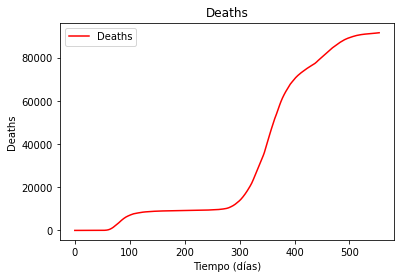

In [39]:
plt.plot(range(0, len(T_deaths_smooth_fix)), T_deaths_smooth_fix, 'r', label="Deaths")
plt.xlabel("Tiempo (días)")
plt.ylabel("Deaths")
plt.legend()

plt.title("Deaths")

In [40]:
T_deaths_smooth_fix[-1]

91798.28571428571

In [41]:
T_confirmed_fix[-1]

3786003